# 밑바닥부터 시작하는 데이터 과학
데이터 분석을 위한 파이썬 프로그래밍과 수학통계 기초
- - -

## 5장. 통계

### 5.1 데이터셋 설명하기

In [8]:
# 모듈 불러오기
from collections import Counter
import math
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# 친구 수
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,
               15,15,15,14,14,13,13,13,13,12,12,11,10,
               10,10,10,10,10,10,10,10,10,10,10,10,10,
               10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,
               8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,
               7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,
               6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,
               5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,
               4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,
               3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,
               2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
               1,1,1,1,1,1]

In [5]:
friend_counts = Counter(num_friends)
print(friend_counts)

Counter({6: 22, 1: 22, 4: 20, 3: 20, 9: 18, 5: 17, 2: 17, 10: 15, 7: 15, 8: 13, 15: 4, 13: 4, 21: 2, 19: 2, 18: 2, 14: 2, 12: 2, 100: 1, 49: 1, 41: 1, 40: 1, 25: 1, 16: 1, 11: 1})


In [7]:
friend_counts[1]

22

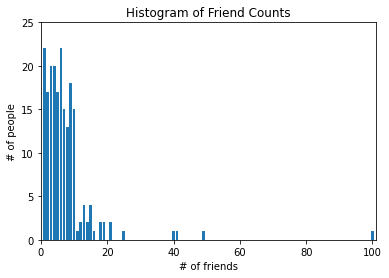

In [9]:
# 친구 수 히스토그램
def make_friend_counts_histogram(plt):
    friend_counts = Counter(num_friends)
    xs = range(101)
    ys = [friend_counts[x] for x in xs]
    plt.bar(xs, ys)
    plt.axis([0, 101, 0, 25])
    plt.title('Histogram of Friend Counts')
    plt.xlabel('# of friends')
    plt.ylabel('# of people')
    plt.show()


make_friend_counts_histogram(plt)

In [13]:
# 총 몇명의 사람을 대상으로 한 것인가?
num_points = len(num_friends)
print('대상 인원:', num_points, '명')

대상 인원: 204 명


In [14]:
# 친구 수의 최대값과 최소값
min_friend = min(num_friends)
max_friend = max(num_friends)
print('최대 친구 수:', max_friend)
print('최소 친구 수:', min_friend)

최대 친구 수: 100
최소 친구 수: 1


In [15]:
# (정렬을 이용한) 친구 수의 최대값과 최소값 구하기
sorted_friends = sorted(num_friends)
min_value = sorted_friends[0]
max_value = sorted_friends[-1]
print('최대 친구 수:', max_value)
print('최소 친구 수:', min_value)

최대 친구 수: 100
최소 친구 수: 1


### 5.1.1 중심 경향성
- 평균은 이상치에 매우 민감하다. 
    - 데이터에 대한 잘못된 정보를 줄 수 있다.

In [17]:
# 평균
def mean(x):
    return sum(x) / len(x)


round(mean(num_friends), 2)

7.33

In [18]:
# 중앙값(median)
def median(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2

    # 데이터의 갯수가 홀수일 경우
    if n % 2 == 1:
        return sorted_v[midpoint]

    # 데이터의 갯수가 짝수일 경우
    else:
        lo = midpoint - 1
        hi = midpoint + 1
        return (sorted_v[lo] + sorted_v[hi]) / 2


median(num_friends)

6.0

In [20]:
# 분위
def quantile(x, p):
    p_index = int(p * len(x))
    return sorted(x)[p_index]


print(quantile(num_friends, 0.10))
print(quantile(num_friends, 0.25))
print(quantile(num_friends, 0.75))
print(quantile(num_friends, 0.90))

1
3
9
13


In [21]:
# 최빈값(최빈값 하나 이상일 경우 리스트로 반환)
def mode(x):
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]


mode(num_friends)

[6, 1]

### 5.1.2 산포도
- 데이터가 얼마나 퍼져있는지를 나타낸다.
- 보통 0과 근접한 값이면 데이터가 거의 퍼져있지 않다는 의미

In [22]:
def data_range(x):
    return max(x) - min(x)


data_range(num_friends)

99

In [23]:
# numpy 이용
np.max(num_friends) - np.min(num_friends)

99

In [26]:
# 분산(variance)
def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]


def variance(x):
    n = len(x)
    deviations = de_mean(x)
    # n -1 로 나누는 이유는 편향(bias)때문에 모분산에 대한 추정값이 실제 모분산보다 작게 계산되는 것을 보정
    return sum([i**2 for i in deviations]) / (n - 1)


variance(num_friends)

81.54351395730707

In [29]:
# numpy 이용(연산이 더 빠름)
np.var(num_friends)

81.14379084967321

In [27]:
# 표준편차(standard deviation)
def standard_deviation(x):
    return math.sqrt(variance(x))


standard_deviation(num_friends)

9.030144736232474

- 표준편차 또한 평균처럼 이상치에 민감할 수 있다
    - (이상치 영향 제거)상위 25% 값과 하위 25% 값의 차이를 계산

In [28]:
# 상위 25%의 값과 하위 25% 값의 차이 계산
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)


interquartile_range(num_friends)

6

### 5.2 상관관계

In [30]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,
                 57.13,51.4,41.42,31.22,34.76,54.01,
                 38.79,47.59,49.1,27.66,41.03,36.73,
                 48.65,28.12,46.62,35.57,32.98,35,26.07,
                 23.77,39.73,40.57,31.65,31.21,36.32,
                 20.45,21.93,26.02,27.34,23.49,46.94,
                 30.5,33.8,24.23,21.4,27.94,32.24,40.57,
                 25.07,19.42,22.39,18.42,46.96,23.72,26.41,
                 26.97,36.76,40.32,35.02,29.47,30.2,31,
                 38.11,38.18,36.31,21.03,30.86,36.07,28.66,
                 29.08,37.28,15.28,24.17,22.31,30.17,25.53,
                 19.85,35.37,44.6,17.23,13.47,26.33,35.02,
                 32.09,24.81,19.33,28.77,24.26,31.98,25.73,
                 24.86,16.28,34.51,15.23,39.72,40.8,26.06,
                 35.76,34.76,16.13,44.04,18.03,19.65,32.62,
                 35.59,39.43,14.18,35.24,40.13,41.82,35.45,
                 36.07,43.67,24.61,20.9,21.9,18.79,27.61,
                 27.21,26.61,29.77,20.59,27.53,13.82,33.2,
                 25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,
                 24.62,26.25,18.21,28.08,19.42,29.79,32.8,
                 35.99,28.32,27.79,35.88,29.06,36.28,14.1,
                 36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,
                 14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,
                 13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,
                 18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,
                 31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,
                 33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,
                 23.39,30.93,15.03,21.67,31.09,33.29,22.61,
                 26.89,23.48,8.38,27.81,32.35,23.84]

In [31]:
# 공분산(numpy 이용)
np.cov(num_friends, daily_minutes)

array([[ 81.54351396,  22.42543514],
       [ 22.42543514, 100.78589895]])

In [34]:
# 상관관계
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return np.cov(x, y) / stdev_x / stdev_y
    else:
        return 0


correlation(num_friends, daily_minutes)[0][1]

0.24736957366478207

In [35]:
# numpy 이용
np.corrcoef(num_friends, daily_minutes)

array([[1.        , 0.24736957],
       [0.24736957, 1.        ]])

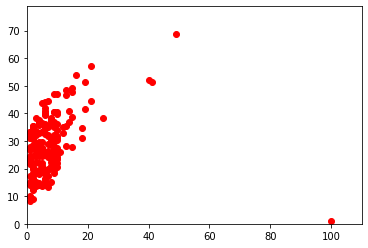

In [36]:
plt.plot(num_friends, daily_minutes, 'ro')
plt.axis([0, max(num_friends) + 10, 0, max(daily_minutes) + 10])
plt.show()

In [37]:
# 이상치 제거 후 상관관계
outlier = num_friends.index(100)
num_friends_good = [x for i, x in enumerate(num_friends)
                    if i != outlier]
daily_minutes_good = [x for i, x in enumerate(daily_minutes)
                if i != outlier]

correlation(num_friends_good, daily_minutes_good)[0][1]

0.5736792115665598

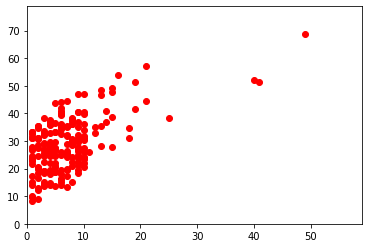

In [38]:
plt.plot(num_friends, daily_minutes, 'ro')
plt.axis([0, max(num_friends_good) + 10, 0, max(daily_minutes_good) + 10])
plt.show()

### 5.3 심슨의 역설
- 전체 데이터 비교 시 경향과 세부 데이터 비교 시 경향이 다른 결과를 보이는 것
- 항상 숲과 나무를 동시에 파악하고 분석하는 습관을 기르자

### 5.5 상관관계와 인과관계
- "상관관계가 인과관계를 의미하지 않는다"
- 인과관계를 확인해 보는 방법에는 무작위 선택하여 두 그룹에 다른 요인을 적용해보자